<a href="https://colab.research.google.com/github/SK-0911/Loan-Approval-Case-Study/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Understanding**

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it to their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

- **The client with payment difficulties:** he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

- **All other cases:** All other cases when the payment is paid on time.


When a client applies for a loan, there are four types of decisions that could be taken by the client/company:

1. **Approved:** The Company has approved loan Application

2. **Cancelled:** The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client, he received worse pricing which he did not want.

3. **Refused:** The company had rejected the loan (because the client does not meet their requirements etc.).

4. **Unused offer:**  Loan has been cancelled by the client but at different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency to default.

## Importing Libraries

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
import warnings

warnings.filterwarnings('ignore')

## Loading Dataset

In [132]:
app_data = pd.read_csv('application_data.csv')
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
app_data.shape

(307511, 122)

In [14]:
len(app_data)

307511

In [15]:
app_data.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

## Handling Missing Values

In [16]:
# Percentage of missing values
print(app_data.isnull().sum() / len(app_data) * 100)

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64


In [17]:
# Columns with more than 40% missing values

null_cols = app_data.isnull().sum()[app_data.isnull().sum() > 0.4 * len(app_data)].index.tolist()
null_cols

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

In [18]:
len(null_cols)

49

In [19]:
# Dropping those 49 columns where there are more than 40% NULL values
app_data.drop(null_cols, axis=1, inplace=True)

In [20]:
# Checking if those columns are dropped (There should be 122-49 = 73 columns)
app_data.shape

(307511, 73)

In [21]:
# Now let's check the columns wit NULL values again

(app_data.isnull().sum()/len(app_data)*100).sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
                                 ...    
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
TARGET                          0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
Length: 73, dtype: float64

Out of these `OCCUPATION_TYPE` has the highest number of NULL Values, and it's crucial for analysis too

Filling the `OCCUPATION_TYPE`  with mode won't make sense instead let's impute **'Unknown'** wherever there is a NULL value.

In [22]:
app_data['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

In [23]:
app_data['OCCUPATION_TYPE'].fillna(value='Unknown', inplace = True)

In [24]:
# Check if the values have been replaced

app_data['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Unknown                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

In [25]:
# Checking the NULL values in OCCUPATION_TYPE

app_data['OCCUPATION_TYPE'].isnull().sum()

0

In [26]:
# Dropping Irrelevant columns

irrelevant_cols = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
                   'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
                   'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
                   'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
                   'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
                   'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
                   'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_WORK_CITY',
                   'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY', 'REG_CITY_NOT_LIVE_CITY', 'LIVE_CITY_NOT_WORK_CITY',
                   'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
                   ]

irrelevant_cols

['FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_WORK_CITY',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_CITY_NOT_LIVE_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE']

In [27]:
# Delete the columns which are not relevant for the analysis

app_data.drop(irrelevant_cols, axis=1, inplace=True)

Let's check the **categorical** and **numerical** columns. As a general rule of thumb I am assuming that columns with numerical values will have datatype as `int64` or `float64` and columns with categorical values will have datatype as `object`

In [28]:
# Identifying numerical columns

numerical_cols = app_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

Target is categorical column

In [29]:
len(numerical_cols)

24

In [30]:
# Identifying categorical columns

categorical_cols = app_data.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [31]:
len(categorical_cols)

12

In [32]:
app_data.shape

(307511, 36)

In [33]:
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

## Handling 'Unknown' data values

There are some categorical columns where the value is mentioned as 'XNA' which means 'Not Available'. Let's take a look at those columns

In [34]:
# Categorical Columns with 'XNA'

app_data.loc[:, categorical_cols].isin(['XNA']).sum()

NAME_CONTRACT_TYPE                0
CODE_GENDER                       4
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
NAME_TYPE_SUITE                   0
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
OCCUPATION_TYPE                   0
WEEKDAY_APPR_PROCESS_START        0
ORGANIZATION_TYPE             55374
dtype: int64

In [35]:
# Finding percentage of XNA values in CODE_GENDER and ORGANIZATION_TYPE columns

print((app_data[app_data['CODE_GENDER']=='XNA'].shape[0]/app_data.shape[0])*100)
print((app_data[app_data['ORGANIZATION_TYPE']=='XNA'].shape[0]/app_data.shape[0])*100)

0.0013007664766463637
18.00716071945394


In [36]:
app_data.CODE_GENDER.value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [37]:
# Handling CODE_GENDER column (replacing XNA as mode i.e. F)

app_data['CODE_GENDER'].replace('XNA', 'F', inplace=True)

In [38]:
# Check
app_data.CODE_GENDER.value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

In [39]:
# Handling ORGANIZATION_TYPE column

app_data['ORGANIZATION_TYPE'].replace('XNA', 'Unknown', inplace=True)

In [40]:
# Check
app_data['ORGANIZATION_TYPE'].value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
Unknown                   55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

Checking Missing values in numerical columns

In [41]:
# Checking missing columns in numerical columns

app_data[numerical_cols].isnull().sum()

SK_ID_CURR                        0
TARGET                            0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
CNT_FAM_MEMBERS                   2
HOUR_APPR_PROCESS_START           0
REG_REGION_NOT_LIVE_REGION        0
EXT_SOURCE_2                    660
EXT_SOURCE_3                  60965
DAYS_LAST_PHONE_CHANGE            1
AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
dtype: int64

Missing Values in AMT_ANNUITY and AMT_GOODS_PRICE column

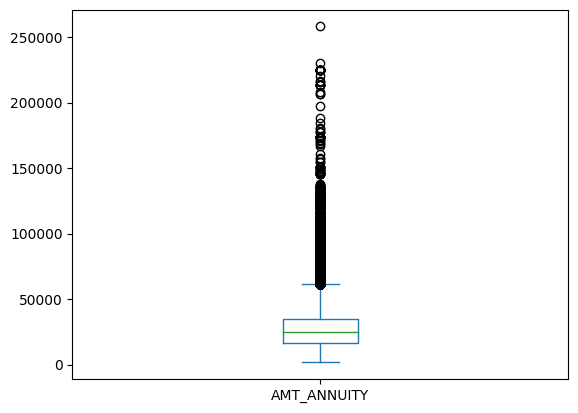

In [42]:
# Box Plot for AMT_ANNUITY

app_data['AMT_ANNUITY'].plot(kind='box')
plt.show()

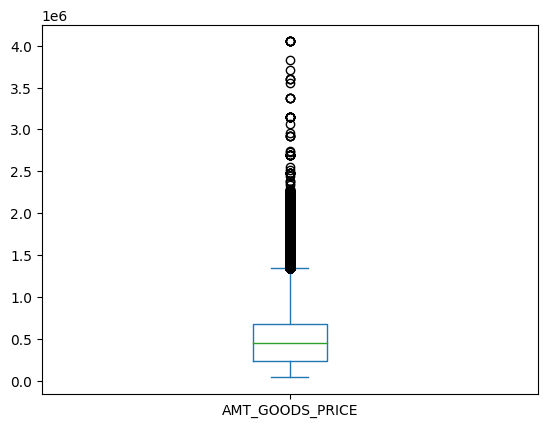

In [43]:
# Box Plot for AMT_GOODS_PRICE column

app_data['AMT_GOODS_PRICE'].plot(kind='box')
plt.show()

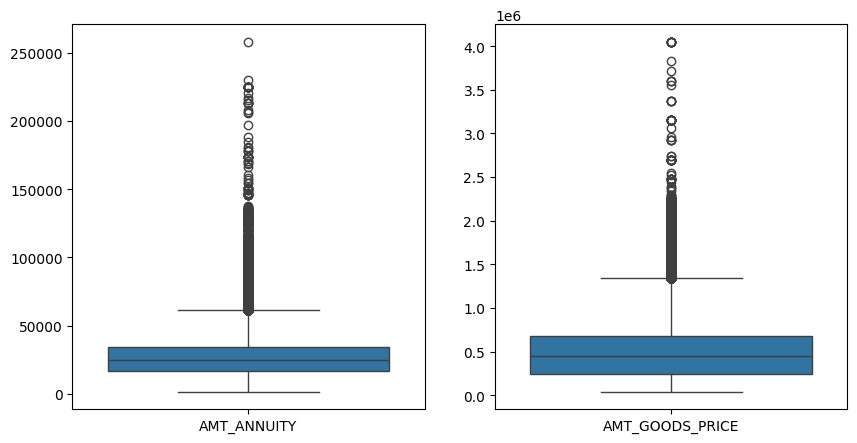

In [44]:
# Box Plot for AMT_ANNUITY and AMT_GOODS_PRICE column

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(data=app_data[['AMT_ANNUITY']])
plt.subplot(1,2,2)
sns.boxplot(data=app_data[['AMT_GOODS_PRICE']])
plt.show()

We can clearly see that both columns have outliers, so it's best that we replace it with median values and not mean

In [45]:
app_data['AMT_ANNUITY'].fillna(app_data['AMT_ANNUITY'].median(),inplace=True)
app_data['AMT_GOODS_PRICE'].fillna(app_data['AMT_GOODS_PRICE'].median(),inplace=True)

In [46]:
# Check

app_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                   0
NAME_TYPE_SUITE                1292
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
OCCUPATION_TYPE                   0
CNT_FAM_MEMBERS                   2
WEEKDAY_APPR_PROCESS_START        0
HOUR_APPR_PROCESS_START           0
REG_REGION_NOT_LIVE_REGION        0
ORGANIZATION_TYPE                 0
EXT_SOURCE_2                

Dealing with Missing values in NAME_TYPE_SUITE column

In [47]:
app_data['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

In [48]:
# Replacing missing values with Mode i.e 'Unaccompanied'

app_data['NAME_TYPE_SUITE'].fillna('Unaccompanied', inplace=True)

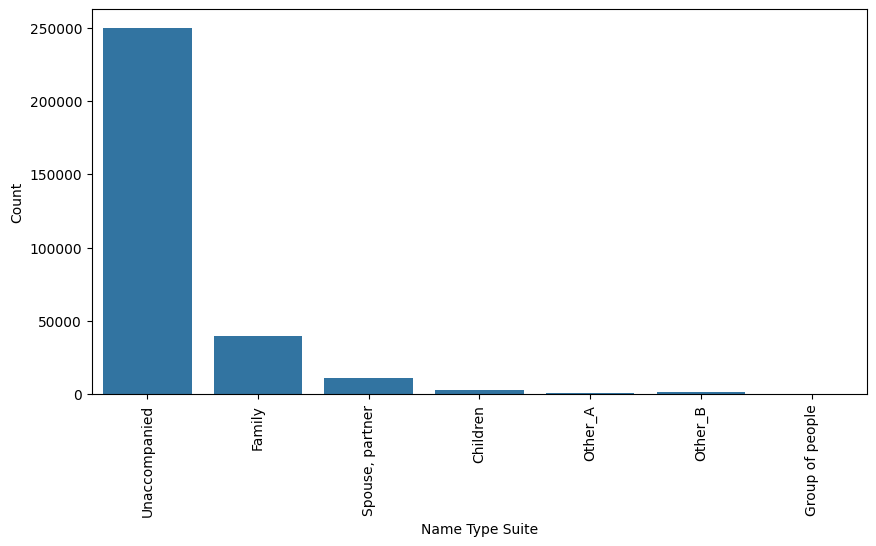

In [49]:
plt.figure(figsize = (10,5))
sns.countplot(data = app_data, x = "NAME_TYPE_SUITE")
plt.xlabel("Name Type Suite")
plt.ylabel("Count")
plt.xticks(rotation = 90)
plt.show()

From Bar Chart, we can see that most of the applicants apply for the loan without any co-applicants

### Converting to positive values in columns where negative values doesn't make sense

In [50]:
# Finding columns that starts with DAYS and have negative values in it

days_cols = [col for col in app_data.columns if col.startswith('DAYS')]
days_cols

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [51]:
# Finding if any or all days_cols have negative values

app_data[days_cols].min().astype('int64')

DAYS_BIRTH               -25229
DAYS_EMPLOYED            -17912
DAYS_REGISTRATION        -24672
DAYS_ID_PUBLISH           -7197
DAYS_LAST_PHONE_CHANGE    -4292
dtype: int64

In [52]:
# Changing all the negative values as positive values

app_data[days_cols] = app_data[days_cols].abs()
app_data[days_cols].min().astype('int64')

DAYS_BIRTH                7489
DAYS_EMPLOYED                0
DAYS_REGISTRATION            0
DAYS_ID_PUBLISH              0
DAYS_LAST_PHONE_CHANGE       0
dtype: int64

Converting `DAYS_BIRTH` to `Age` and `DAYS_EMPLOYED` to `'YEARS_EMPLOYED'`

In [53]:
app_data['Age'] = app_data['DAYS_BIRTH'].apply(lambda x: round(x/365))
app_data['YEARS_EMPLOYED'] = app_data['DAYS_EMPLOYED'].apply(lambda x: round(x/365))

In [54]:
# Dropping DAYS_BIRTH and DAYS_EMPLOYED

app_data.drop(['DAYS_BIRTH', 'DAYS_EMPLOYED'], axis=1, inplace=True)

In [55]:
numerical_cols.remove('DAYS_BIRTH')
numerical_cols.remove('DAYS_EMPLOYED')
numerical_cols.append('Age')
numerical_cols.append('YEARS_EMPLOYED')

In [56]:
numerical_cols
# print(len(numerical_cols))

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'Age',
 'YEARS_EMPLOYED']

## Analysis

### Data Imbalance

In [57]:
# Dividing the dataset into 2 parts

Target0 = app_data.loc[app_data.TARGET == 0]
Target1 = app_data.loc[app_data.TARGET == 1]

In [58]:
print(Target0.shape[0])
print(Target1.shape[0])

282686
24825


In [83]:
# Since Target0 is greater than Target1

imbalance = round(Target0.shape[0]/Target1.shape[0], 2)
print('Imbalance Ratio:', imbalance)

Imbalance Ratio: 11.39


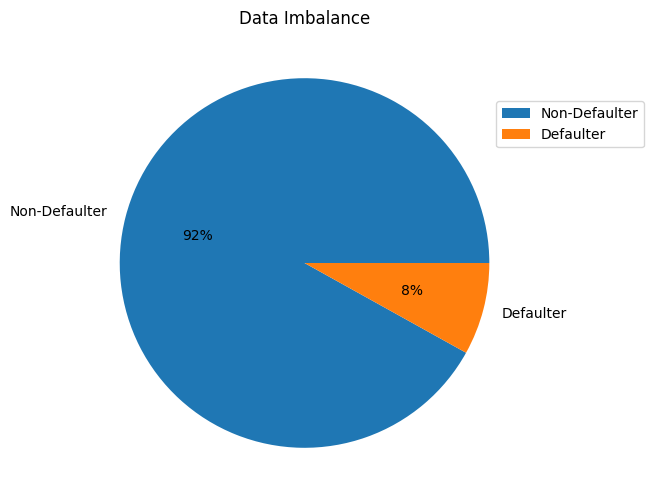

In [76]:
# Plot a pie chart to show data imbalance

plt.figure(figsize=(8,6))
plt.pie(
    app_data['TARGET'].value_counts(),
    labels = ['Non-Defaulter', 'Defaulter'],
    autopct= '%1.0f%%'
)
plt.legend(
    labels=['Non-Defaulter', 'Defaulter'],
    loc='center left',
    bbox_to_anchor=(0.9, 0.8)
)
plt.title('Data Imbalance')
plt.show()

### Organisation Type

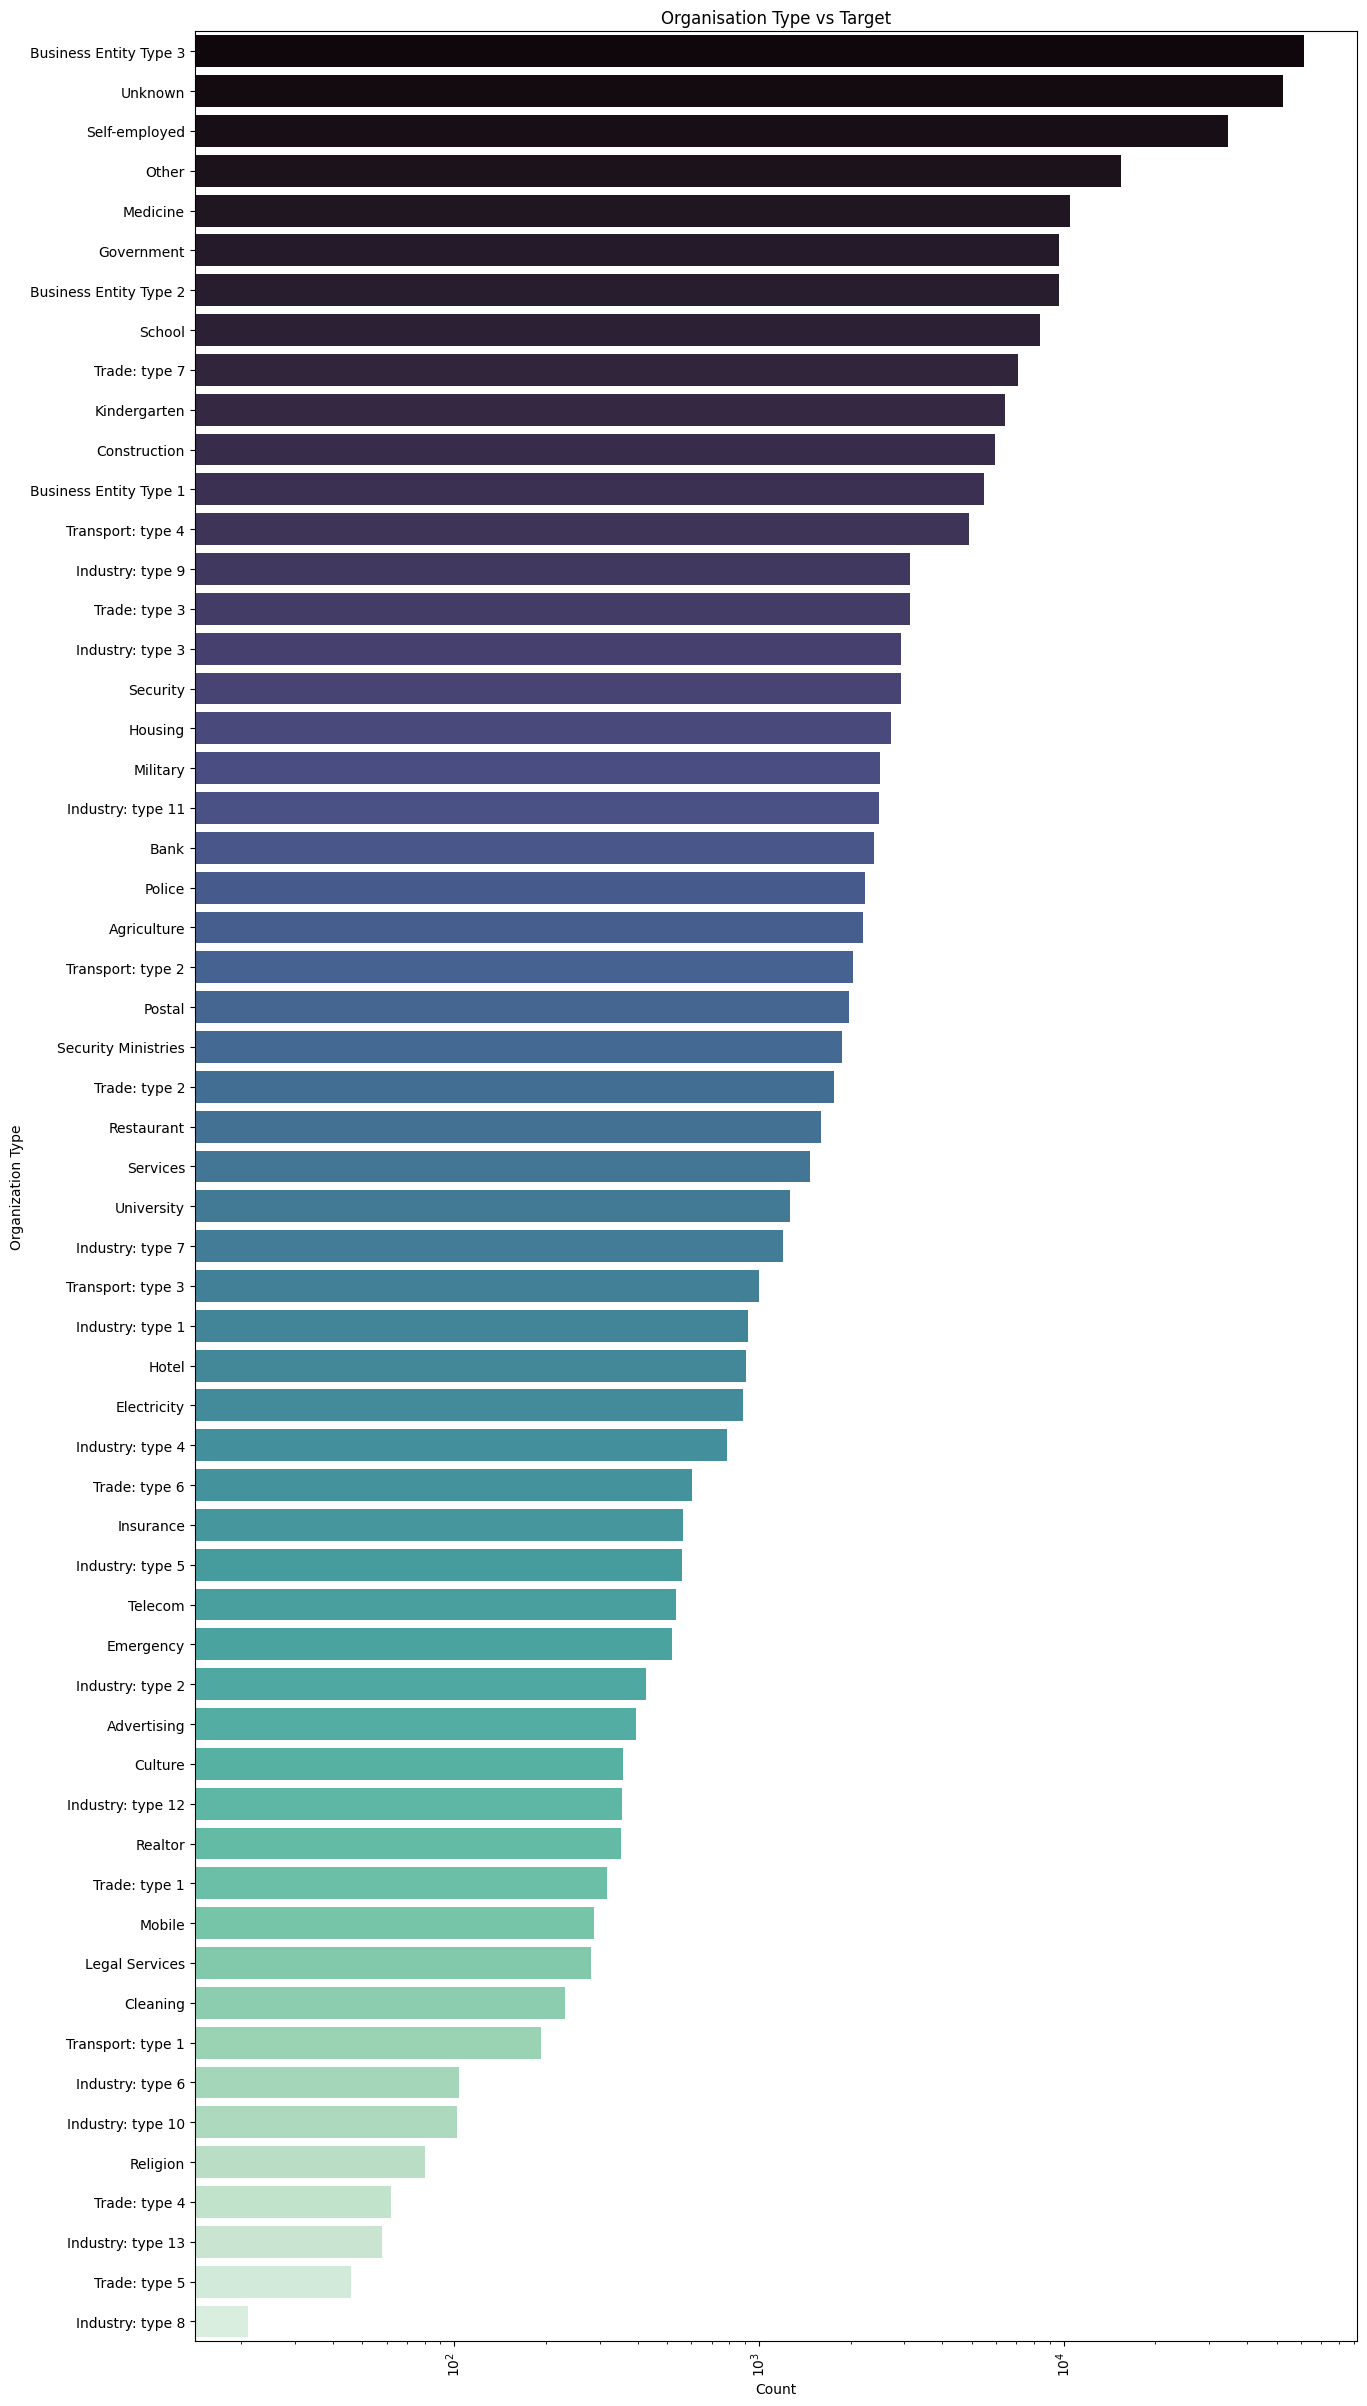

In [84]:
# Plotting Organisation Type vs Target0

plt.figure(figsize=(15,30))
sns.countplot(
    data=Target0,
    y='ORGANIZATION_TYPE',
    order = Target0['ORGANIZATION_TYPE'].value_counts().index,
    palette='mako'
)
plt.title('Organisation Type vs Target')
plt.xlabel('Count')
plt.ylabel('Organization Type')
plt.xticks(rotation=90)
plt.xscale('log')
plt.show()

- Most of the applicants who paid on time are either from Business Entity Type 3 or are self-employed individuals.

### Housing Type

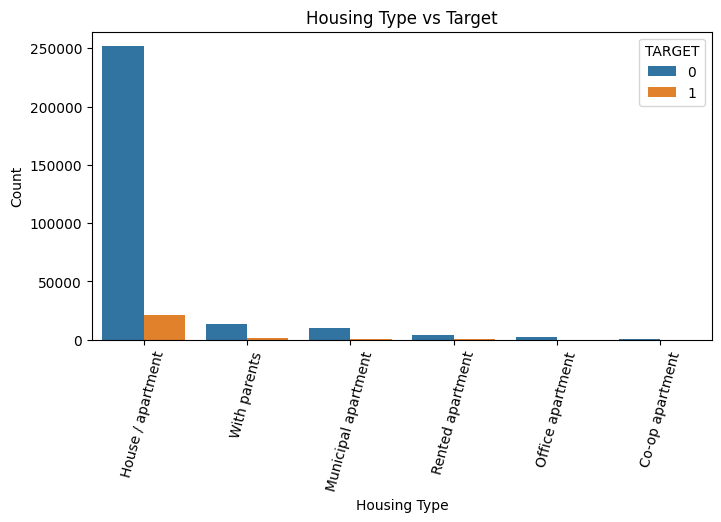

In [85]:
# Analysing housing type of applicants who did their payments on time

plt.figure(figsize=(8,4))
sns.countplot(
    data=app_data,
    x='NAME_HOUSING_TYPE',
    order = app_data['NAME_HOUSING_TYPE'].value_counts().index,
    hue='TARGET'
)
plt.title('Housing Type vs Target')
plt.xlabel('Housing Type')
plt.ylabel('Count')
plt.xticks(rotation=75)
plt.show()

- Applicants who own a house or an apartment are the safest to target

### Income Range

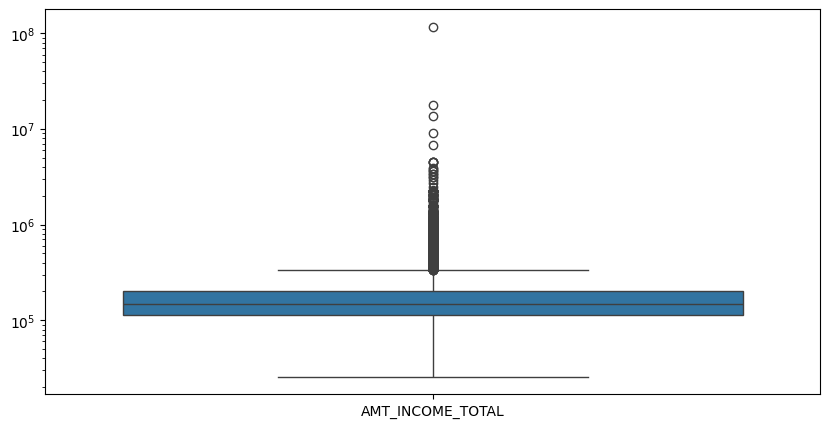

In [86]:
# Box Plot for income

plt.figure(figsize=(10,5))
sns.boxplot(data=app_data[['AMT_INCOME_TOTAL']])
plt.yscale('log')
plt.show()

In [87]:
# Creating bins for AMT_INCOME_TOTAL

bins = [0,100000,200000,300000,400000,500000,10000000000]
slot = ['<100000','100000-200000', '200000-300000','300000-400000','400000-500000','500000 and above']

app_data['AMT_INCOME_RANGE']=pd.cut(app_data['AMT_INCOME_TOTAL'],bins,labels=slot)

In [88]:
app_data['AMT_INCOME_RANGE'].value_counts()

AMT_INCOME_RANGE
100000-200000       155898
200000-300000        65176
<100000              63698
300000-400000        14676
400000-500000         5361
500000 and above      2702
Name: count, dtype: int64

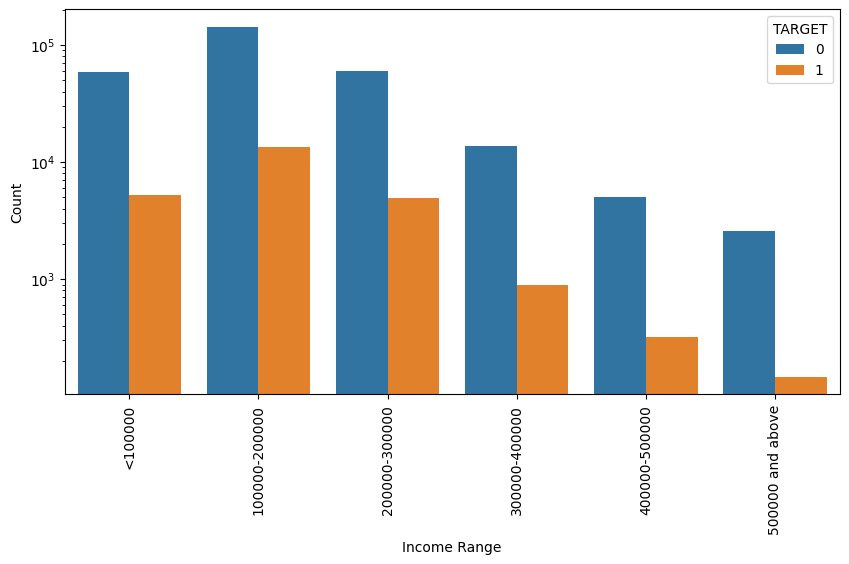

In [89]:
# Plotting AMT_INCOME_RANGE vs Target

plt.figure(figsize=(10,5))
sns.countplot(data=app_data, x='AMT_INCOME_RANGE', hue='TARGET')
plt.xticks(rotation=90)
plt.yscale('log')
plt.xlabel('Income Range')
plt.ylabel('Count')
plt.show()

- We usually expect that higher salaries would lead to more on-time payments. However, we observe a decrease in successful payments as salary increases beyond a certain range.

### Gender

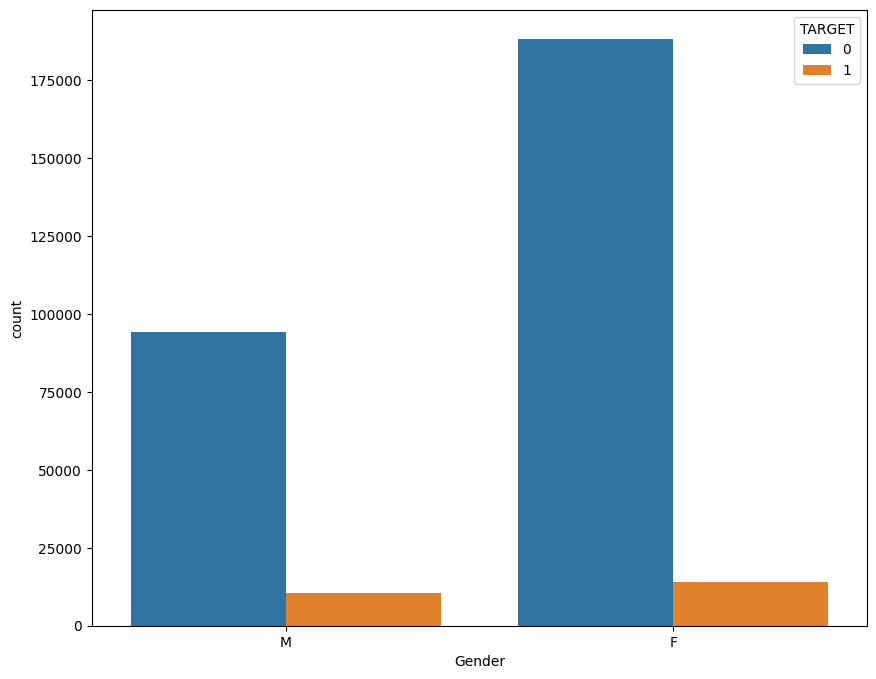

In [90]:
# Plotting Gender vs Target

plt.figure(figsize=(10,8))
sns.countplot(data=app_data, x='CODE_GENDER', hue=app_data['TARGET'])
plt.xlabel('Gender')
plt.show()

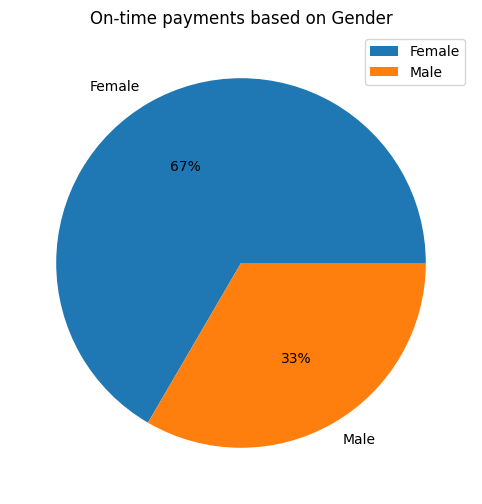

In [77]:
# Plotting a pie chart Gender vs Target0

plt.figure(figsize=(8,6))
plt.pie(
    Target0['CODE_GENDER'].value_counts(),
    labels = ['Female', 'Male'],
    autopct= '%1.0f%%'
)
plt.legend(
    labels=['Female', 'Male']
)
plt.title('On-time payments based on Gender')
plt.show()

- The number of female applicants with successful payments are almost double the than male defaulters.

### Family Members and Children Count

In [91]:
app_data['CNT_CHILDREN'].value_counts()

CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: count, dtype: int64

In [92]:
app_data['CNT_FAM_MEMBERS'].value_counts()

CNT_FAM_MEMBERS
2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: count, dtype: int64

In [93]:
app_data['CNT_FAM_MEMBERS'].isnull().sum()

2

In [94]:
app_data['CNT_FAM_MEMBERS'].fillna(0, inplace=True)

In [95]:
# Converting float values in CNT_FAM_MEMBERS to int value

app_data['CNT_FAM_MEMBERS'] = app_data['CNT_FAM_MEMBERS'].astype('int64')

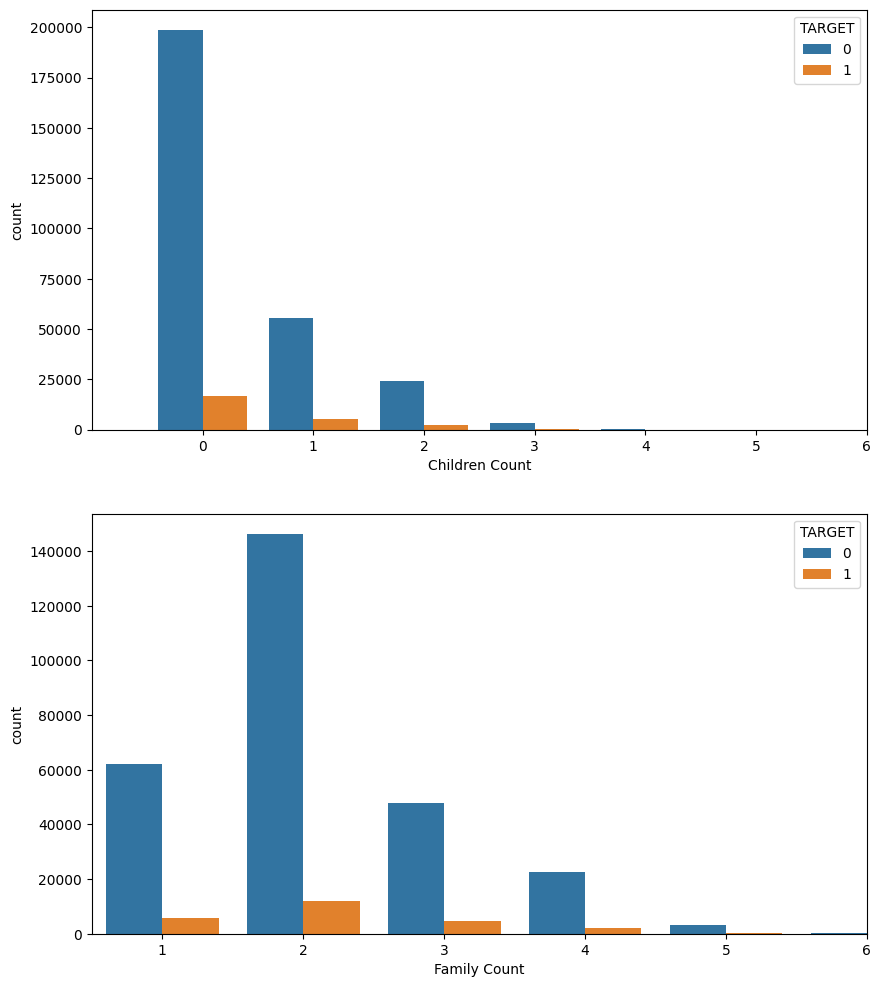

In [96]:
# Plotting CNT_CHILDREN vs Target

plt.figure(figsize=(10,12))
plt.subplot(2,1,1)
sns.countplot(data=app_data, x='CNT_CHILDREN', hue='TARGET')
plt.xlabel('Children Count')
plt.xlim(-1,6)
plt.subplot(2,1,2)
sns.countplot(data=app_data, x='CNT_FAM_MEMBERS', hue='TARGET')
plt.xlabel('Family Count')
plt.xlim(0.5,6)
plt.show()

- Loans are preferably given to applicants with no children or those with two family members. We observe a huge gap between the difference of on-time payments and unsuccesful payments

### Assets

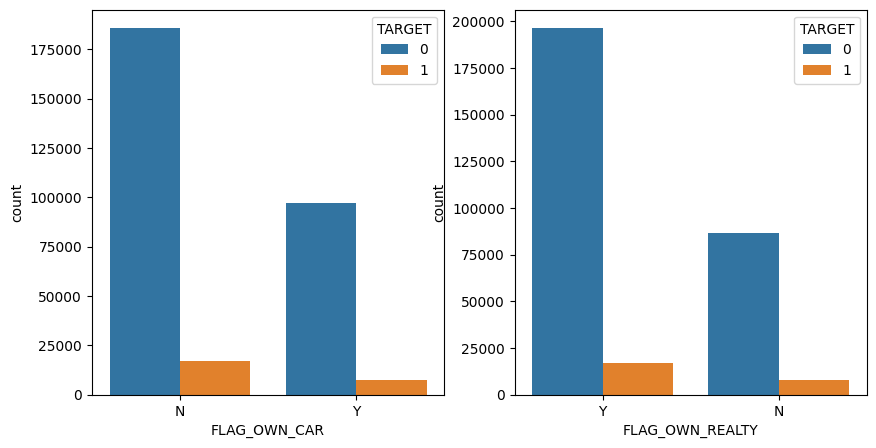

In [97]:
# Plotting 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY' vs Target

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(data=app_data, x='FLAG_OWN_CAR', hue='TARGET')
plt.subplot(1,2,2)
sns.countplot(data=app_data, x='FLAG_OWN_REALTY', hue='TARGET')
plt.show()

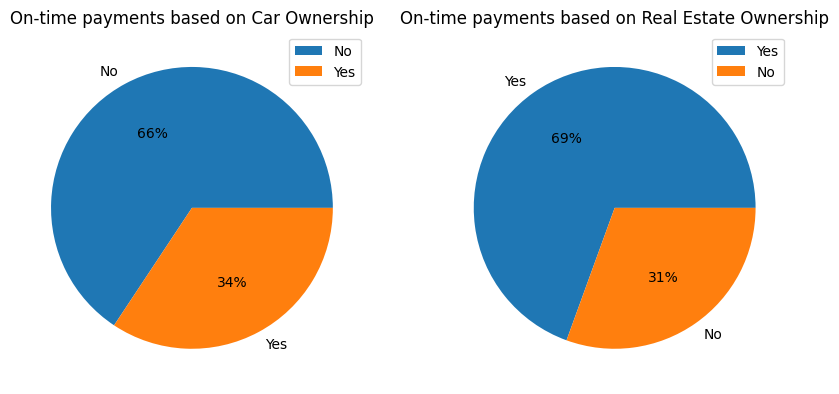

In [81]:
# Plotting two pie charts for Target0

plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.pie(
    Target0['FLAG_OWN_CAR'].value_counts(),
    labels = ['No', 'Yes'],
    autopct= '%1.0f%%'
)
plt.title('On-time payments based on Car Ownership')
plt.legend(
    labels=['No', 'Yes']
)


plt.subplot(1,2,2)
plt.pie(
    Target0['FLAG_OWN_REALTY'].value_counts(),
    labels = ['Yes', 'No'],
    autopct= '%1.0f%%',
)
plt.title('On-time payments based on Real Estate Ownership')
plt.legend(
    labels=['Yes', 'No']
)
plt.show()

- Applicants without a car have nearly double the successful repayments compared to those with a car.

- We also observed that applicants who on realty have successful repayments probably because they can put their real estate property as their collateral.

### Age Group

In [98]:
# Plotting Age vs Target

bins = [15,25,35,45,55,65,150]
slots = ['15-25','25-35','35-45','45-55','55-65','65 and above']
app_data['AGE_GROUP']= pd.cut(app_data['Age'],bins=bins, labels=slots)

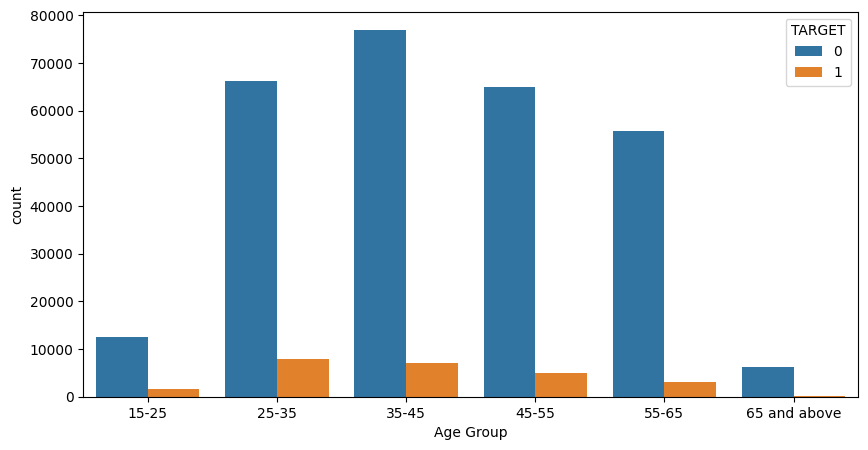

In [99]:
plt.figure(figsize=(10,5))
sns.countplot(data=app_data, x='AGE_GROUP', hue='TARGET')
plt.xlabel('Age Group')
plt.show()

- The majority of applicants who make on-time payments are aged between 25 and 65.

### Income Type

In [82]:
app_data['NAME_INCOME_TYPE'].value_counts()

NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64

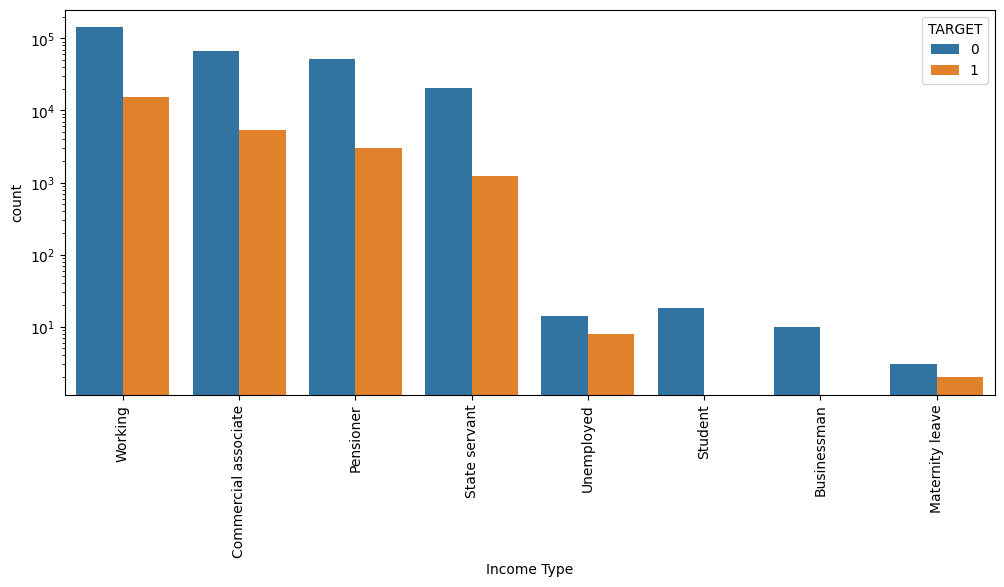

In [100]:
# Plot Income type vs Target

plt.figure(figsize=(12,5))
sns.countplot(data=app_data, x='NAME_INCOME_TYPE', hue='TARGET', order=app_data['NAME_INCOME_TYPE'].value_counts().index)
plt.xticks(rotation=90)
plt.yscale('log')
plt.xlabel('Income Type')
plt.show()

In [101]:
# Difference of 0 and 1 of Student and Businessman

app_data.loc[(app_data['NAME_INCOME_TYPE'] == 'Student')]['TARGET'].value_counts()

TARGET
0    18
Name: count, dtype: int64

In [102]:
app_data.loc[(app_data['NAME_INCOME_TYPE'] == 'Businessman')]['TARGET'].value_counts()

TARGET
0    10
Name: count, dtype: int64

- Most of the applicants with on-time payment are from Working, commericial associates and Pensioner.
- Despite, there is a small percentage of applicants who are students and businessman, none of those applicants delayed in their repayment.
- Applicants who are Unemployed or on Maternity leave have  difficulties in payment.

### Family Status

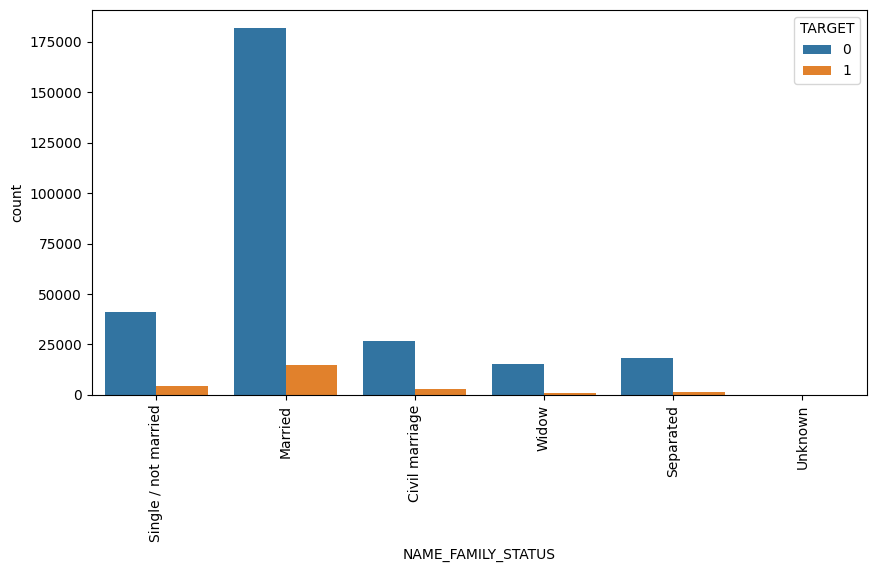

In [103]:
# Plotting Family Status vs Target

plt.figure(figsize=(10,5))
sns.countplot(data=app_data, x='NAME_FAMILY_STATUS', hue='TARGET')
plt.xticks(rotation=90)
plt.show()

- Although many applicants are married, we observe that most of the on-time payments are done by them

# Previous Application

In [143]:
prev_data = pd.read_csv('previous_application.csv')
prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
prev_data.shape   # (1670214, 37)

(1670214, 37)

In [145]:
prev_data['SK_ID_PREV'].unique().shape[0]

1670214

In [146]:
prev_data['SK_ID_CURR'].unique().shape[0]

338857

- We observe that there are 338,857 unique values in `SK_ID_CURR` and 1,670,214 unique values in `SK_ID_PREV`, with the length of `prev_data` being the same. This indicates that there are duplicate values in SK_ID_CURR.

In [147]:
prev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

## Handling data values

In [148]:
# Replacing all the XNA and XAP to Null

prev_data.replace('XNA', np.nan, inplace=True)
prev_data.replace('XAP', np.nan, inplace=True)

In [149]:
# Removing the rows where NAME_CASH_LOAN_PURPOSE is 'XNA' or 'XAP'

prev_data=prev_data.drop(prev_data[prev_data['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
prev_data=prev_data.drop(prev_data[prev_data['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

prev_data.shape

(1670214, 37)

In [150]:
prev_data.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

### Merging Previous Application with the application data

In [162]:
# Merging the Application dataset with previous appliaction dataset

combined_data=app_data.merge(prev_data, left_on='SK_ID_CURR',right_on='SK_ID_CURR',how='inner')

In [163]:
# Irrelevant Columns

irrelevant_cols = ['FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']

irrelevant_cols

['FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY']

In [164]:
# Dropping the columns which are irrelevant

combined_data.drop(irrelevant_cols, axis=1, inplace=True)

In [165]:
# Null values in remaining columns

combined_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE_x              0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
DAYS_FIRST_DUE               561106
DAYS_LAST_DUE_1ST_VERSION    561106
DAYS_LAST_DUE                561106
DAYS_TERMINATION             561106
NFLAG_INSURED_ON_APPROVAL    561106
Length: 156, dtype: int64

In [166]:
combined_data.shape

(1413701, 156)

In [167]:
combined_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x',
       ...
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object', length=156)

In [169]:
# Segregating the dataset into Target0 and Target1

Target0 = combined_data.loc[combined_data.TARGET == 0]
Target1 = combined_data.loc[combined_data.TARGET == 1]

### Loan Purpose

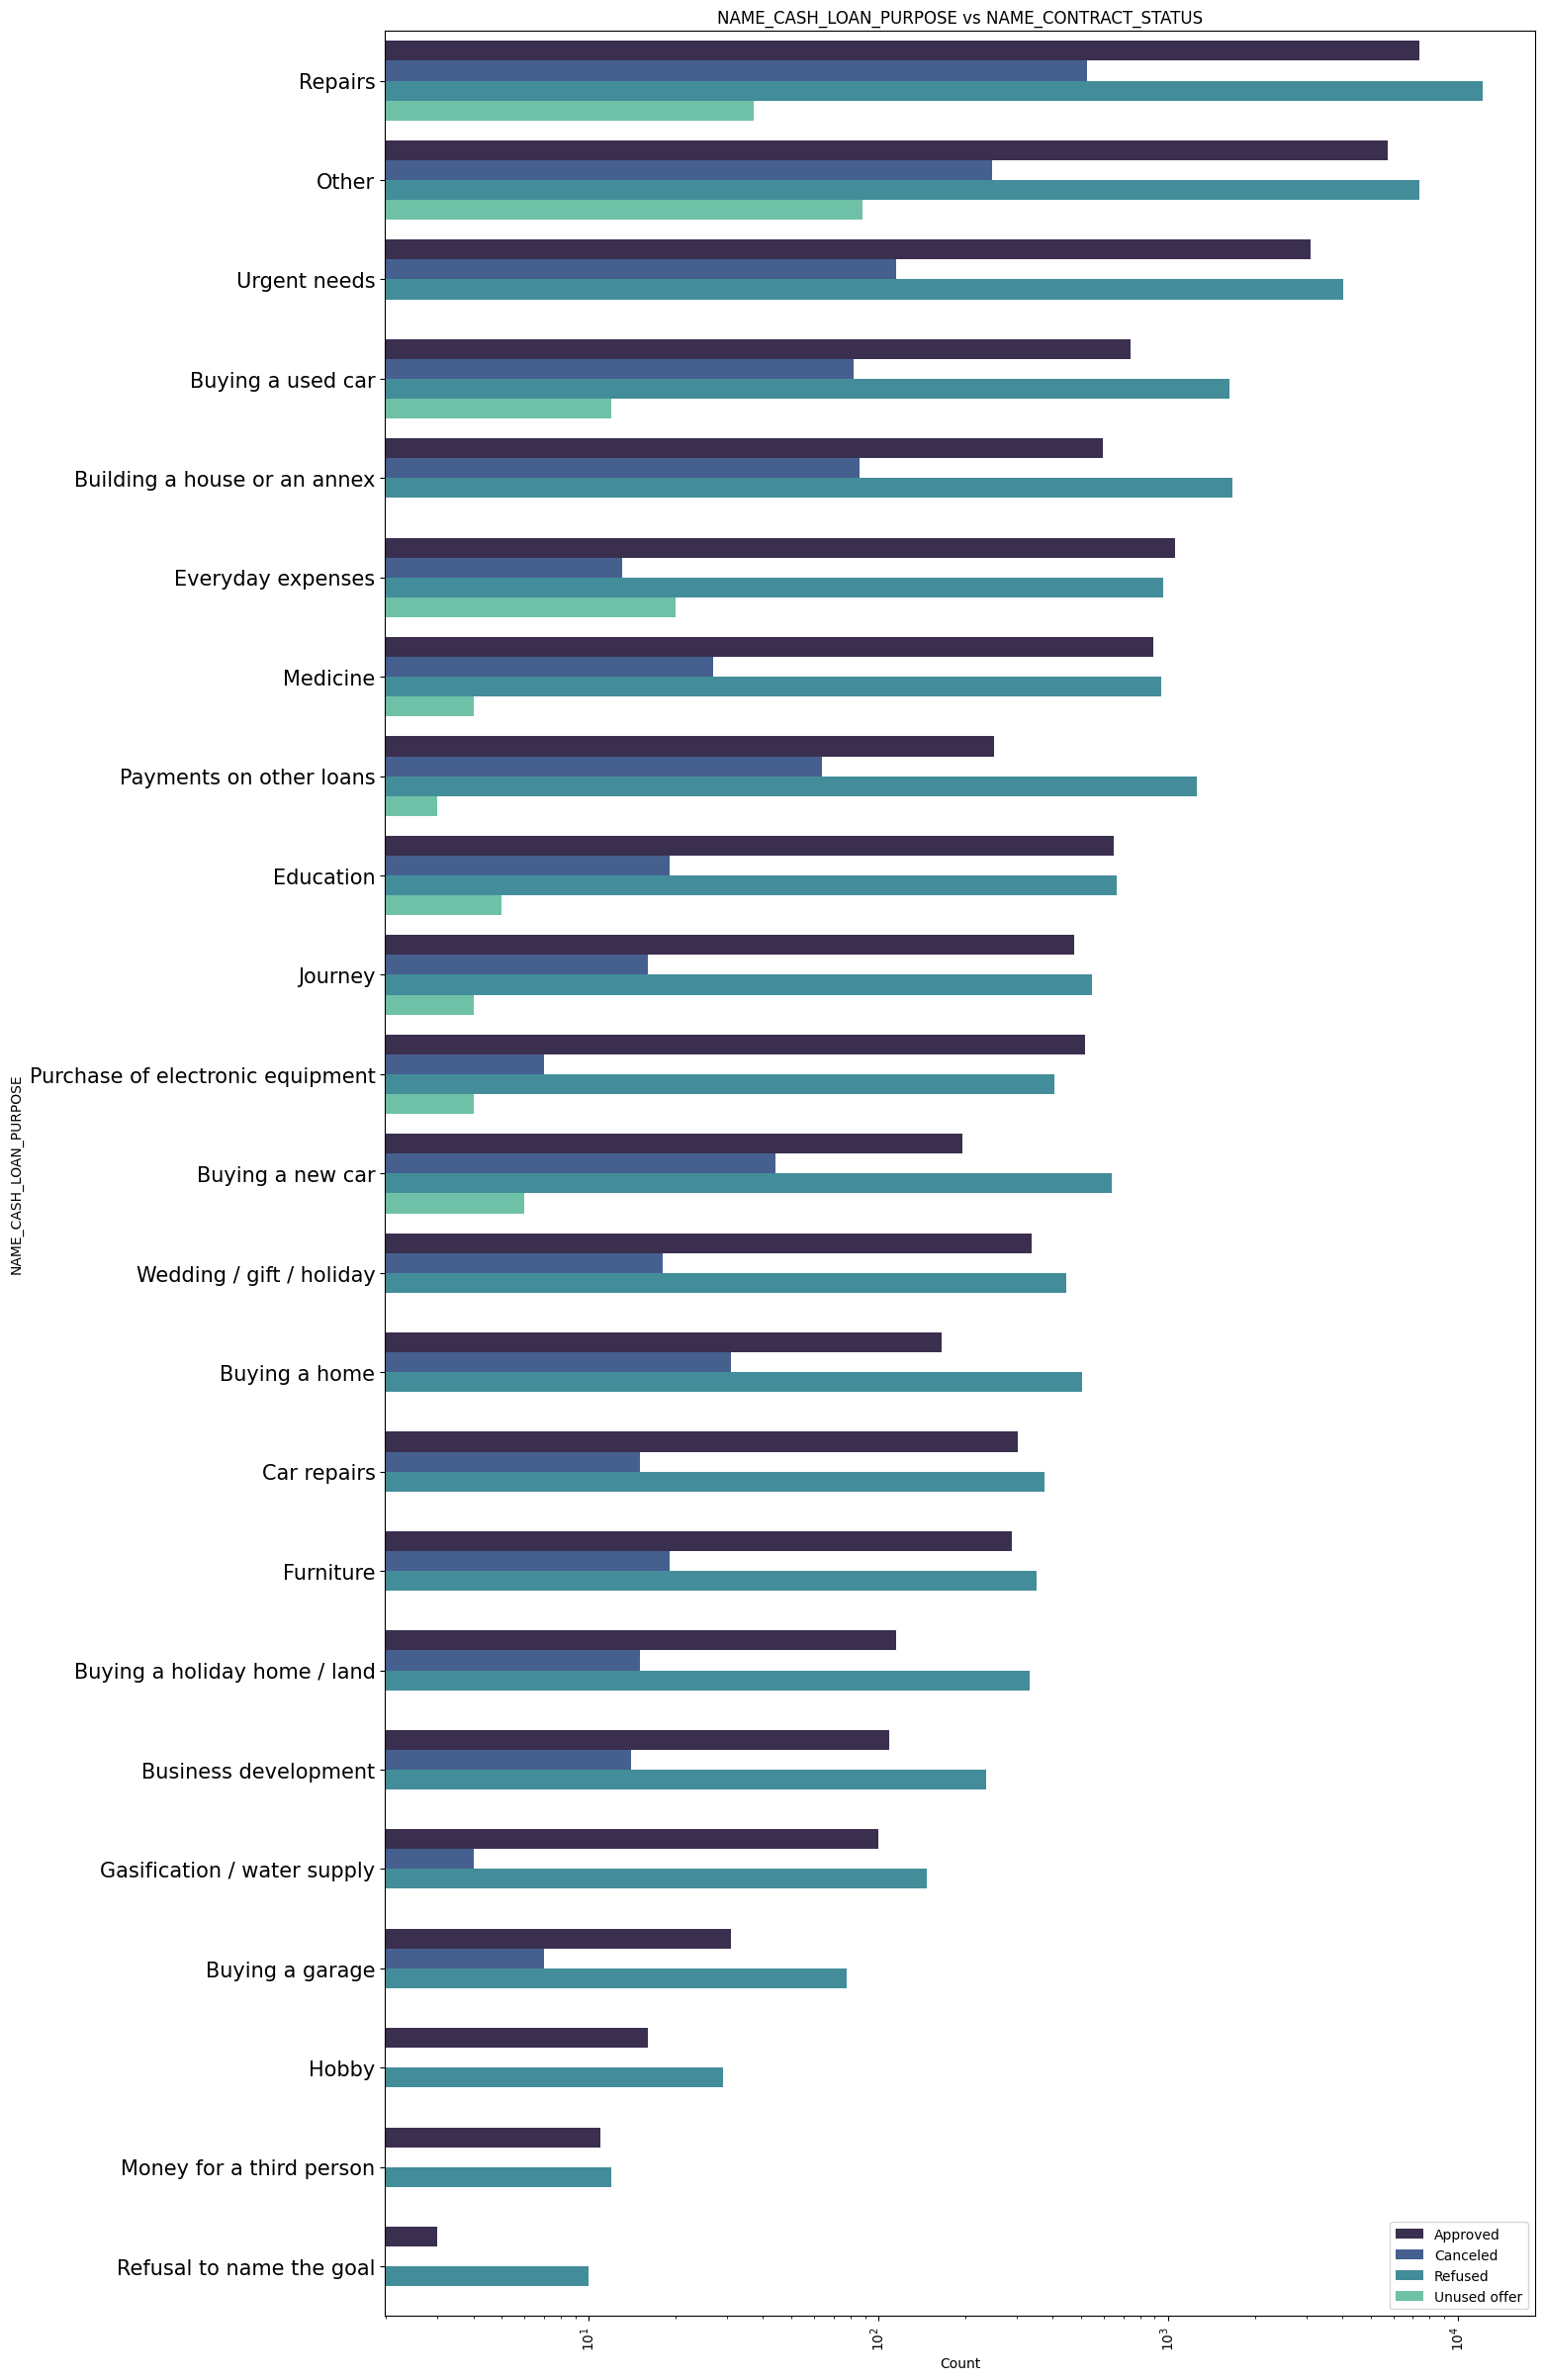

In [177]:
# Plotting a bar for NAME_CASH_LOAN_PURPOSE with NAME_CONTRACT_STATUS

plt.figure(figsize=(15,30))
sns.countplot(
    data=combined_data,
    y='NAME_CASH_LOAN_PURPOSE',
    hue='NAME_CONTRACT_STATUS',
    order = combined_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index,
    palette='mako'
    )
plt.legend()
plt.xscale('log')
plt.xticks(rotation=90)
plt.yticks(fontsize=15)
plt.title('NAME_CASH_LOAN_PURPOSE vs NAME_CONTRACT_STATUS')
plt.xlabel('Count')
plt.ylabel('NAME_CASH_LOAN_PURPOSE')
plt.show()

- Most loan rejections were for the purpose of "repairs." For education loans, there is an equal number of approvals and rejections.

**Conclusion:**

1. Banks should prefer giving loans to applicants who have
no children and those who have less than 3 family members.
2. Banks should prefer giving loans to applicants whose income type is Working, Commercial associates, pensioners or state servants.
3. Banks should not prefer giving loan to applicants who are on maternity leave or unemployed.
4. Applicants who don't own a car and own atleast one real-estate property are safest to give loan.
5. Most applicants who make on-time payments are between the ages of 25 to 65.